In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#### EDA

In [2]:
fcdata = pd.read_csv("D:/Data Science/Assignments/Decision Trees/Fraud_check.csv")
fcdata.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fcdata.shape

(600, 6)

In [5]:
fcdata.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fcdata.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [7]:
fcdata.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
newdata = pd.DataFrame(fcdata)
newdata

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
data = newdata.rename(columns= {"Marital.Status" : "marital_status", "Taxable.Income" : "tax_income", "City.Population" : "city_population",
         "Work.Experience" : "work_ex"}, inplace = True)

In [10]:
newdata

,Undergrad,marital_status,tax_income,city_population,work_ex,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


##### Convert Target Variable to Categorical Variable

In [11]:
newdata["taxable_income"] = np.where(newdata['tax_income']<=30000,'Risky','Good') 

In [12]:
newdata.head()

,Undergrad,marital_status,tax_income,city_population,work_ex,Urban,taxable_income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [13]:
newdata.taxable_income.unique()

array(['Good', 'Risky'], dtype=object)

In [14]:
newdata.drop(['tax_income', 'city_population'], axis=1, inplace= True)
newdata

,Undergrad,marital_status,work_ex,Urban,taxable_income
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label = LabelEncoder()

In [17]:
newdata['Undergrad']= label.fit_transform(newdata['Undergrad']) 
newdata['marital_status']= label.fit_transform(newdata['marital_status']) 
newdata['Urban']= label.fit_transform(newdata['Urban'])

In [18]:
newdata.head()

,Undergrad,marital_status,work_ex,Urban,taxable_income
0,0,2,10,1,Good
1,1,0,18,1,Good
2,0,1,30,1,Good
3,1,2,15,1,Good
4,0,1,28,0,Good


In [19]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    int32 
 1   marital_status  600 non-null    int32 
 2   work_ex         600 non-null    int64 
 3   Urban           600 non-null    int32 
 4   taxable_income  600 non-null    object
dtypes: int32(3), int64(1), object(1)
memory usage: 16.5+ KB


In [20]:
X = newdata.iloc[:,:4]
X

,Undergrad,marital_status,work_ex,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [21]:
Y = newdata.iloc[:,-1]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: taxable_income, Length: 600, dtype: object

In [22]:
newdata.taxable_income.value_counts()

Good     476
Risky    124
Name: taxable_income, dtype: int64

### Building Random Forest Classifier using Entropy Criteria

In [23]:
# Splitting data into training and testing data set
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.33,random_state=40)

In [24]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, criterion = 'entropy')
model.fit(X_train,Y_train)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6916666666666667


In [25]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     172
Risky     26
dtype: int64

In [26]:
# Accuracy 
np.mean(preds==Y_test)

0.6919191919191919

In [27]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

        Good       0.86      0.77      0.81       172
       Risky       0.11      0.19      0.14        26

    accuracy                           0.69       198
   macro avg       0.49      0.48      0.48       198
weighted avg       0.76      0.69      0.72       198



### Building XGB Classifier 

In [28]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [29]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [30]:
# fit model in training data
model = XGBClassifier()
model.fit(X_train, Y_train)

[21:57:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# make predictions for test data
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts() # getting the count of each category 

Good     175
Risky     23
dtype: int64

In [32]:
y_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 

In [33]:
# Accuracy 
np.mean(y_pred==Y_test)

0.7272727272727273

In [34]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

        Good       0.88      0.80      0.84       175
       Risky       0.10      0.17      0.13        23

    accuracy                           0.73       198
   macro avg       0.49      0.49      0.48       198
weighted avg       0.79      0.73      0.76       198



In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[140  19]
 [ 35   4]]

True Positives(TP) =  140

True Negatives(TN) =  4

False Positives(FP) =  19

False Negatives(FN) =  35


<AxesSubplot:>

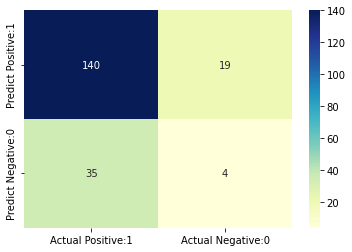

In [36]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Building LGBM Classifier

In [37]:
# split data into train and test sets
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=None)

In [38]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)

LGBMClassifier()

In [39]:
# predict the results
y_predict=clf.predict(X_test)
pd.Series(y_pred).value_counts() # getting the count of each category 

Good     175
Risky     23
dtype: int64

In [40]:
# Accuracy 
np.mean(y_predict==Y_test)

0.7575757575757576

In [41]:
print(classification_report(y_predict,Y_test))

              precision    recall  f1-score   support

        Good       0.92      0.80      0.86       183
       Risky       0.08      0.20      0.11        15

    accuracy                           0.76       198
   macro avg       0.50      0.50      0.49       198
weighted avg       0.86      0.76      0.80       198



In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, y_predict)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[147  12]
 [ 36   3]]

True Positives(TP) =  147

True Negatives(TN) =  3

False Positives(FP) =  12

False Negatives(FN) =  36


<AxesSubplot:>

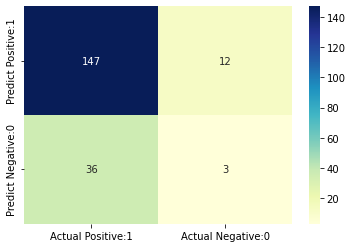

In [43]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')